In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
print(torch.__version__)

1.12.1+cu113


In [3]:
print(torchvision.__version__)

0.13.1+cu113


In [4]:
train_data = datasets.FashionMNIST(
    root="vision", 
    train=True, 
    download=True, 
    transform=ToTensor(), 
    target_transform=None 
)


test_data = datasets.FashionMNIST(
    root="vision",
    train=False, 
    download=True,
    transform=ToTensor(),
    target_transform = None
)

In [5]:
len(train_data)

60000

In [6]:
len(test_data)

10000

In [11]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [12]:
train_data[0][1]

9

In [14]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [15]:
idx = train_data.class_to_idx
idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

the shape is torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

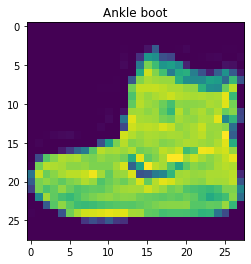

In [17]:

import matplotlib.pyplot as plt
image = train_data[0][0]
label = train_data[0][1]
print(f"the shape is {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

In [42]:
random_idx = torch.randint(0, len(train_data),(1,)).item()
random_idx

48567

In [43]:
train_data[random_idx]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000,
           0.0039, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

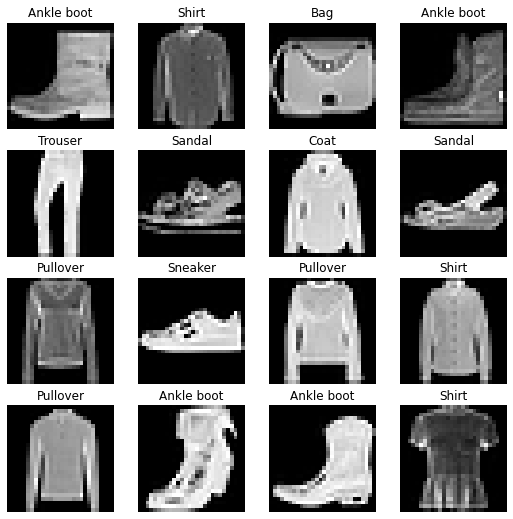

In [39]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows = 4
cols = 4
for i in range(rows*cols):
    random_idx = torch.randint(0, len(train_data),(1,)).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);
    



In [45]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32


train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE,  
    shuffle=True 
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False 
)



print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [51]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch,train_labels_batch


(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [49]:
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [66]:
flat = nn.Flatten()
x = train_features_batch[0]

In [67]:
flat

Flatten(start_dim=1, end_dim=-1)

In [68]:
x.shape

torch.Size([1, 28, 28])

In [69]:
x = flat(x)
x.shape

torch.Size([1, 784])

In [70]:
# BASIC MODEL
class Mnist_model(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
        
    )

  def forward(self,x):
    return self.layers(x)


In [71]:
torch.manual_seed(42)

# Need to setup model with input parameters
model1 = Mnist_model(input_shape=784, 
    hidden_units=20, 
    output_shape=len(class_names) 
)
model1.to("cpu")

Mnist_model(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [72]:
from torch.optim import Adam
opt = Adam(model1.parameters(),lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [73]:
#SIMPLE FOR LOOP FOR IMPLEMENTING BACK PROP AND COMPUTING LOSS
if __name__ == "__main__":
  for epoch in range(10):
      for batch in train_dataloader:
           X,y = batch
           X,y = X.to('cpu'),y.to('cpu')
           yhat = model1(X)
           loss = loss_fn(yhat,y)

           opt.zero_grad()
           loss.backward()
           opt.step()

      print(f"Epoch:{epoch} loss is {loss.item()}")

   

Epoch:0 loss is 0.6615551710128784
Epoch:1 loss is 0.5833523273468018
Epoch:2 loss is 0.29454123973846436
Epoch:3 loss is 0.24904805421829224
Epoch:4 loss is 0.22272083163261414
Epoch:5 loss is 0.23874717950820923
Epoch:6 loss is 0.21378234028816223
Epoch:7 loss is 0.3309798538684845
Epoch:8 loss is 0.4164390563964844
Epoch:9 loss is 0.503753662109375


In [79]:
# Create a convolutional neural network with TinyVGG
class MNISTModel2(nn.Module):
    
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) 
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
          
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        print(x.shape)
        
       
        x = self.block_2(x)
        print(x.shape)
        
        x = self.classifier(x)
        print(x.shape)
       
        return x

torch.manual_seed(42)
model2 = MNISTModel2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to('cpu')
model2

MNISTModel2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [80]:
from torch.optim import Adam
opt = Adam(model2.parameters(),lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [81]:
#SIMPLE FOR LOOP FOR IMPLEMENTING BACK PROP AND COMPUTING LOSS
if __name__ == "__main__":
  for epoch in range(10):
      for batch in train_dataloader:
           X,y = batch
           X,y = X.to('cpu'),y.to('cpu')
           yhat = model2(X)
           loss = loss_fn(yhat,y)

           opt.zero_grad()
           loss.backward()
           opt.step()

      print(f"Epoch:{epoch} loss is {loss.item()}")

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])


In [ ]:
# THE FINAL LOSS OF OUR SIMPLE MODEL IS 0.50

In [ ]:
# THE FINAL LOSS OF OUR CNN WITH TinyVGG IS 0.28 
# SO WE CAN SEE THE IMPROVEMENT FOR TRAININING THE MODEL FOR THE SAME NUMBERS OF EPOCHS = 10
